In [2]:
#Building Speech to text

#Importing Libraries 

import pandas as pd 
import numpy as np 
from scipy.fftpack import fft
from scipy import signal 
from scipy.io import wavfile
import librosa
from sklearn.decomposition import PCA

import os 
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import warnings #it is imported so as to avoid and filter unecessary warnings
warnings.filterwarnings("ignore")

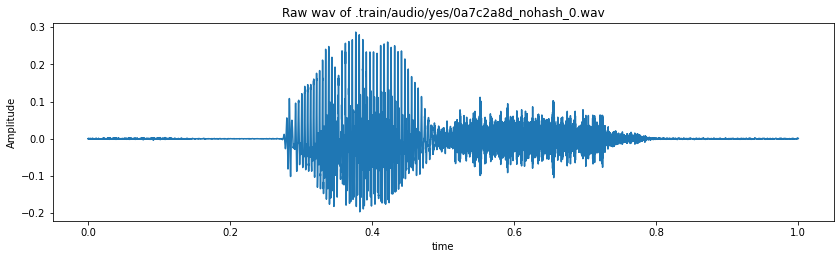

In [3]:
#visualization of audio signals in time series domain
train_audio_path= 'D:/speech'
samples,sample_rate=librosa.load(train_audio_path +'/'+ 'yes/0a7c2a8d_nohash_0.wav',sr=16000)
fig=plt.figure(figsize=(14,8))
ax1=fig.add_subplot(211)
ax1.set_title("Raw wav of "+".train/audio/yes/0a7c2a8d_nohash_0.wav")
ax1.set_xlabel("time")
ax1.set_ylabel("Amplitude")
ax1.plot(np.linspace(0,sample_rate/len(samples),sample_rate),samples)

In [4]:
#sampling rate
ipd.Audio(samples,rate=sample_rate)
#printing the samples of audio 
print(samples)
#Resampling 
"""we resample the audio signal to 8000hz because most of the speech related 
signals are present at 8000hz"""
samples=librosa.resample(samples,sample_rate,8000)
ipd.Audio(samples,rate=sample_rate)#plays resampled audio 

[ 0.00042725 -0.00021362 -0.00042725 ...  0.00057983  0.00061035
  0.00082397]


In [5]:
#Now understand no. of recordings of each voice commands
labels=os.listdir(train_audio_path)

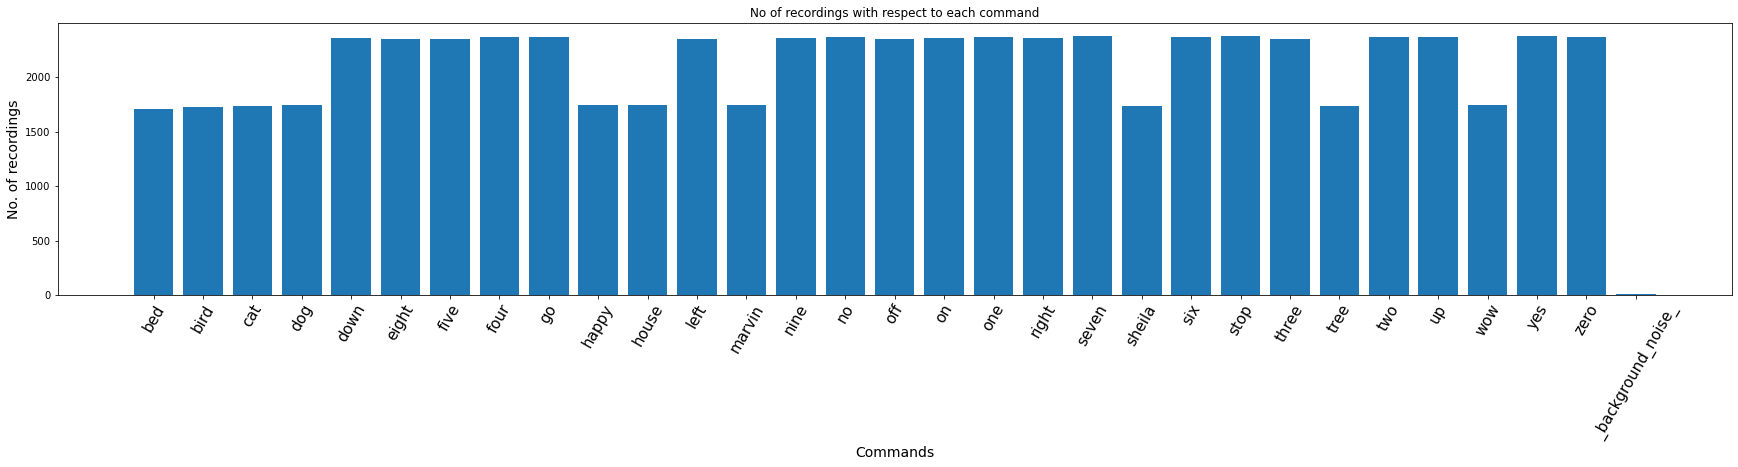

In [6]:
#find the count of each label and plot the bar graph
no_of_recordings=[]
for label in labels:
  waves=[f for f in os.listdir(train_audio_path+'/'+label)if f.endswith('.wav')]
  no_of_recordings.append(len(waves))
#plot
plt.figure(figsize=(30,5))
index=np.arange(len(labels))
plt.bar(index,no_of_recordings)
plt.xlabel('Commands',fontsize=14)
plt.ylabel("No. of recordings",fontsize=14)
plt.xticks(index,labels,fontsize=15,rotation=60)
plt.title("No of recordings with respect to each command")
plt.show()

In [7]:
labels=["yes","no","up","down","left","right","on","off","stop","go"]

(array([1.5000e+01, 3.0000e+01, 4.4000e+01, 1.3800e+02, 1.3600e+02,
        1.7900e+02, 3.6600e+02, 4.3400e+02, 5.9300e+02, 2.1747e+04]),
 array([0.418 , 0.4762, 0.5344, 0.5926, 0.6508, 0.709 , 0.7672, 0.8254,
        0.8836, 0.9418, 1.    ]),
 <BarContainer object of 10 artists>)

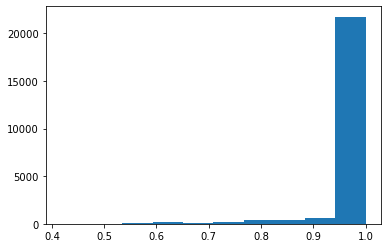

In [8]:
#Duration of recordings
duration_of_recordings=[]
for label in labels:
  waves=[f for f in os.listdir(train_audio_path +'/'+ label)if f.endswith('.wav')]
  for wav in waves:
    sample_rate,samples=wavfile.read(train_audio_path +'/'+ label+'/'+ wav)
    duration_of_recordings.append(float(len(samples)/sample_rate))
plt.hist(np.array(duration_of_recordings))

In [9]:
#preprocessing it includes resampling and removing shorter commands
all_wave=[]
all_label=[]
for label in labels:
    print(labels)
    waves=[f for f in os.listdir(train_audio_path + '/' + label)if f.endswith('.wav')]
    for wav in waves:
        samples,sample_rate=librosa.load(train_audio_path + '/' + label + '/' + wav,sr=16000)
        samples=librosa.resample(samples,sample_rate,8000)
        if(len(samples)==8000):
            all_wave.append(samples)
            all_label.append(label)
        

['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']


In [10]:
#encoding output labels into integers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(all_label)
classes=list(le.classes_)

In [11]:
#Since it is a multiclassification problem we convert integer label to one hot vector
from keras.utils import np_utils
y = np_utils.to_categorical(y, num_classes=len(labels))

In [12]:
#Reshaping 2D array to 3D array
all_wave=np.array(all_wave).reshape(-1,8000,1)

In [13]:
#split train and validation data set into 80:20 ratio
from sklearn.model_selection  import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size=0.2,random_state=777,shuffle=True)

In [14]:
#Building the model using Keras api
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as k
k.clear_session()
inputs=Input(shape=(8000,1))

#First Conv1D layer
conv= Conv1D(8,13,padding='valid',activation='relu',strides=1)(inputs)
conv=MaxPooling1D(3)(conv)
conv=Dropout(0.3)(conv)

#second Conv1D layer

conv= Conv1D(16,11,padding='valid',activation='relu',strides=1)(conv)
conv=MaxPooling1D(3)(conv)
conv=Dropout(0.3)(conv)

#third Conv1D layer
conv=Conv1D(32,9,padding='valid',activation='relu',strides=1)(conv)
conv=MaxPooling1D(3)(conv)
conv=Dropout(0.3)(conv)

#fourth Conv1D layer
conv=Conv1D(64,7,padding='valid',activation='relu',strides=1)(conv)
conv=MaxPooling1D(3)(conv)
conv=Dropout(0.3)(conv)

#Flatten layer

conv= Flatten()(conv)

#Dense layer 1

conv=Dense(128,activation='relu')(conv)
conv=Dropout(0.3)(conv)

#Dense layer 2

conv=Dense(256,activation='relu')(conv)
conv=Dropout(0.3)(conv)

outputs=Dense(len(labels),activation='softmax')(conv)

model= Model(inputs,outputs)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2662, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 2662, 8)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 884, 16)           0     

In [15]:
#calculating cross entropy
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [16]:
#Selecting the best model
es= EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10,min_delta=0.0001)
mc= ModelCheckpoint('best_model.hdf5',monitor='val_acc',verbose=1,save_best_only=True,mode='max')


In [17]:
#Model fiiting
history=model.fit(x_tr,y_tr,epochs=100,callbacks=[es,mc],batch_size=32,validation_data=(x_val,y_val))

Epoch 1/100
533/533 [==============================] - 44s 82ms/step - loss: 2.0476 - accuracy: 0.2175 - val_loss: 1.6755 - val_accuracy: 0.3838
Epoch 2/100
533/533 [==============================] - 49s 93ms/step - loss: 1.5577 - accuracy: 0.3950 - val_loss: 1.3971 - val_accuracy: 0.4947
Epoch 3/100
533/533 [==============================] - 50s 94ms/step - loss: 1.3743 - accuracy: 0.4872 - val_loss: 1.1660 - val_accuracy: 0.5883
Epoch 4/100
533/533 [==============================] - 46s 87ms/step - loss: 1.2422 - accuracy: 0.5406 - val_loss: 1.1363 - val_accuracy: 0.5949
Epoch 5/100
533/533 [==============================] - 49s 92ms/step - loss: 1.1500 - accuracy: 0.5837 - val_loss: 1.0221 - val_accuracy: 0.6517
Epoch 6/100
533/533 [==============================] - 48s 90ms/step - loss: 1.0659 - accuracy: 0.6143 - val_loss: 0.9530 - val_accuracy: 0.6744
Epoch 7/100
533/533 [==============================] - 49s 93ms/step - loss: 1.0045 - accuracy: 0.6405 - val_loss: 0.8993 - val_ac

Epoch 28/100
533/533 [==============================] - 74s 139ms/step - loss: 0.4505 - accuracy: 0.8467 - val_loss: 0.5678 - val_accuracy: 0.8156
Epoch 29/100
533/533 [==============================] - 62s 117ms/step - loss: 0.4331 - accuracy: 0.8503 - val_loss: 0.5243 - val_accuracy: 0.8299
Epoch 30/100
533/533 [==============================] - 58s 108ms/step - loss: 0.4281 - accuracy: 0.8537 - val_loss: 0.5351 - val_accuracy: 0.8309
Epoch 31/100
533/533 [==============================] - 75s 141ms/step - loss: 0.4354 - accuracy: 0.8531 - val_loss: 0.5515 - val_accuracy: 0.8196
Epoch 32/100
533/533 [==============================] - 68s 128ms/step - loss: 0.4218 - accuracy: 0.8564 - val_loss: 0.5703 - val_accuracy: 0.8149
Epoch 33/100
533/533 [==============================] - 59s 110ms/step - loss: 0.4093 - accuracy: 0.8580 - val_loss: 0.5244 - val_accuracy: 0.8332
Epoch 34/100
533/533 [==============================] - 62s 117ms/step - loss: 0.3963 - accuracy: 0.8630 - val_loss: 0

533/533 [==============================] - 64s 120ms/step - loss: 0.3283 - accuracy: 0.8877 - val_loss: 0.4815 - val_accuracy: 0.8487
Epoch 55/100
533/533 [==============================] - 69s 130ms/step - loss: 0.3337 - accuracy: 0.8880 - val_loss: 0.5072 - val_accuracy: 0.8442
Epoch 56/100
533/533 [==============================] - 66s 124ms/step - loss: 0.3102 - accuracy: 0.8920 - val_loss: 0.5620 - val_accuracy: 0.8299
Epoch 57/100
533/533 [==============================] - 56s 104ms/step - loss: 0.3159 - accuracy: 0.8925 - val_loss: 0.4939 - val_accuracy: 0.8487
Epoch 58/100
533/533 [==============================] - 64s 120ms/step - loss: 0.3118 - accuracy: 0.8940 - val_loss: 0.5273 - val_accuracy: 0.8421
Epoch 00058: early stopping


In [19]:
#evaluating model
scores_tr=model.evaluate(x_tr,y_tr)
scores_val=model.evaluate(x_val,y_val)
print("Accuracy of model on training data set is ", '%.2f',scores_tr[1]*100,'\n',"Accuracy of model on validation dataset is ", '%.2f',scores_val[1]*100)

134/134 [==============================] - 2s 17ms/step - loss: 0.5273 - accuracy: 0.8421
Accuracy of model on training data set is  96.49% 
 Accuracy of model on validation dataset is  84.21%


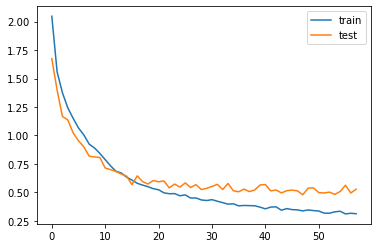

In [28]:
#Diagonistic plot
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [32]:
#Saving Model in HDF5 format
model.save_weights("SpeechToTextDeepLearning.hdf5")
print("Model Saved to Disk")
model.save("SpeechToTextDeepLearningModel")

Model Saved to Disk
INFO:tensorflow:Assets written to: SpeechToTextDeepLearningModel\assets


In [35]:
#Define function that predicts text for given audio 
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [36]:
#Prediction on validation data
import random 
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples,rate=8000)
print("Text: ",predict(samples))


Audio: up
Text:  up


In [87]:
#Script that takes voice input from 
import sounddevice as sd
import soundfile as sf

samplerate=16000
duration=1 #s
filename='test.wav'
print("Start")
mydata=sd.rec(int(samplerate*duration),samplerate=samplerate,channels=1,blocking=True)
print("End")
sd.wait()
sf.write(filename,mydata,samplerate)



Start
End


In [88]:
#Read the saved voice command and convert to text
os.listdir('D:/')
filepath='D:/'
samples,sample_rate=librosa.load(filepath+'/'+'test.wav',sr=16000)
samples=librosa.resample(samples,sample_rate,8000)
ipd.Audio(samples,rate=8000)

predict(samples)

'right'